<a href="https://colab.research.google.com/github/TongHere/WordEmbedding/blob/main/Word2Vec_bigrams_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install library

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=fc422f9ec26db74c3a3780e4ef4bbe22fadfd2e86d516baa10f2af2504de95c3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.4 MB/s eta 0:00:00


In [ ]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#import data

In [ ]:
file_path = '/content/text.xlsx'
data = pd.read_excel(file_path)
print(data.head())

                                                text
0   The virtual spaces where intellectual propert...
1   In this presentation, the various cultural fa...
2   The aim of this presentation is to buttress t...
3  The article analyzes the problems of comparati...
4   Lee Strang’s Originalism’s Promise: A Natural...


#create unigrams

In [ ]:
## create dtf
dtf = pd.DataFrame(data)
## print 5 random rows
dtf.sample(5)

,text
1619,This paper applies Elaine Showalter's theory ...
386,A question central to many narratives of the ...
1626,This paper analyzes in retrospect the role an...
29,This paper discusses translation difficulties...
150,Scholarship on the development of copyright i...


#Data Preprocessing 

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and# characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
        
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
dtf["text_clean"] = dtf["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
dtf.head()

,text,text_clean
0,The virtual spaces where intellectual propert...,virtual space intellectual property ip meet ar...
1,"In this presentation, the various cultural fa...",presentation various cultural factor inhibit a...
2,The aim of this presentation is to buttress t...,aim presentation buttress fact artist writing ...
3,The article analyzes the problems of comparati...,article analyzes problem comparative literatur...
4,Lee Strang’s Originalism’s Promise: A Natural...,lee strangs originalism promise natural law ac...


In [ ]:
# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(dtf.text)
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('top100_words.csv', columns=['word','count'], index=False)
words_all

,word,count
0,the,21576
1,of,16876
2,and,11289
3,to,8053
4,in,7206
...,...,...
95,many,254
96,rights,250
97,within,249
98,should,246


In [ ]:
corpus = dtf["text_clean"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)


In [ ]:
lst_corpus 

In [ ]:
## detect bigram
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, min_count=5, threshold=10)

In [ ]:
word = "data"

#Modeling 

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(lst_corpus, vector_size=100, min_count=1, window=5, sg=1, epochs=10)

# Access the learned word vectors
word_vectors = model.wv

In [ ]:
word = "data"
word_vectors[word].shape

(100,)

#Dimension reduction using tsne and data visualisation

<ipython-input-29-d280400ffcce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_["input"].iloc[0:1] = 1


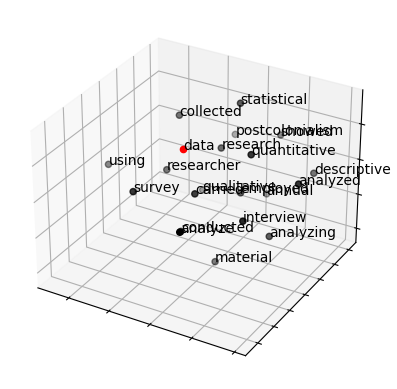

In [ ]:
word = "data"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in model.wv.most_similar(word, topn=20)]
X = model.wv[tot_words]
## tsne reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=20, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

# Next Step

##### the word vectors can be used in a neural network as weights:First, transform the corpus into padded sequences of word ids to get a feature matrix.Then,create an embedding matrix so that the vector of the word with id N is located at the Nth row.Finally, build a neural network with an embedding layer that weighs every word in the sequences with the corresponding vector.

#Why we need word vector 

Why we need Word Vectors ?
We want to encode word tokens each into some vector that represents a point in some sort of "word" space. This is paramount for a number of reasons but the most intuitive reason is that perhaps there actually exists some N-dimensional space (such that N << 13 million) that is sufficient to encode all semantics of our language. Each dimension would encode some meaning that we transfer using speech. For instance, semantic dimensions might indicate tense (past vs. present vs. future), count (singular vs. plural), and gender (masculine vs. feminine).